## Brain Tumor Detection

In [16]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [2]:

path = "C:/Users/lenovo/Brain_Tumor_Classification/brain_tumor_dataset"
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))

['no', 'yes']
253


In [3]:
# 
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

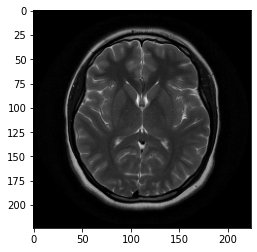

In [4]:
# Plot an image
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

In [5]:

images = np.array(images) / 255.0
labels = np.array(labels)

In [6]:
# Perform One-hot encoding
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[1. 0.]


In [7]:
#Split the dataset
(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [8]:
# Build the Image Data Generator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

In [52]:
base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input
base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="sigmoid")(base_output)

In [53]:
for layer in base_model.layers:
    layer.trainable = False

In [54]:
model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [55]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [56]:
image = tf.random.normal((1, 224, 224, 3))
print(model.predict(image))

[[0.33084828 0.61757696]]


In [57]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [58]:
model.fit(train_generator.flow(train_X, train_Y, batch_size= batch_size),
                              steps_per_epoch= train_steps,
                              validation_data = (test_X, test_Y),
                              validation_steps= validation_steps,
                              epochs= epochs)

Epoch 1/10
28/28 [==============================] - 77s 3s/step - loss: 0.7108 - accuracy: 0.5890 - val_loss: 0.6051 - val_accuracy: 0.6154
Epoch 2/10
28/28 [==============================] - 81s 3s/step - loss: 0.6574 - accuracy: 0.5982 - val_loss: 0.5901 - val_accuracy: 0.9231
Epoch 3/10
28/28 [==============================] - 71s 3s/step - loss: 0.6366 - accuracy: 0.6438 - val_loss: 0.5458 - val_accuracy: 0.9231
Epoch 4/10
28/28 [==============================] - 71s 3s/step - loss: 0.5937 - accuracy: 0.6986 - val_loss: 0.4805 - val_accuracy: 0.7692
Epoch 5/10
28/28 [==============================] - 72s 3s/step - loss: 0.5743 - accuracy: 0.7397 - val_loss: 0.4642 - val_accuracy: 0.9615
Epoch 6/10
28/28 [==============================] - 73s 3s/step - loss: 0.5643 - accuracy: 0.7123 - val_loss: 0.4420 - val_accuracy: 0.9231
Epoch 7/10
28/28 [==============================] - 74s 3s/step - loss: 0.5327 - accuracy: 0.7717 - val_loss: 0.4034 - val_accuracy: 0.9231
Epoch 8/10
28/28 [==

In [59]:
model.save("tumortest9_10epoch.h5")

In [2]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
import numpy
from keras.models import load_model
model = load_model('C:/Users/lenovo/Brain_Tumor_Classification/tumortest9_10epoch.h5')
classes = { 
    0:'Normal',
    1:'Tumeur'
}

top=tk.Tk()
top.geometry('800x600')
top.title('Classification des Tumeurs Cérébrales')
top.configure(background='#e7ebe0')
label=Label(top,background='#e7ebe0', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path).convert('RGB')
    image = image.resize((224,224))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict(image)
    pred = np.argmax(pred, axis= 1)
    print(pred)
    if pred > 0.9:
        pred = 1
    else: 
        pred = 0
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#00203f', text=sign)
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Classifier L'Image",
    command=lambda: classify(file_path),
    padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))
    classify_b.pack(side=BOTTOM,expand=True)
    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Importer une Image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Classification des Tumeurs Cérébrales",pady=20, font=('arial',20,'bold'))
heading.configure(background='#e7ebe0',foreground='#364156')
heading.pack()
top.wm_attributes('-toolwindow','True')
top.mainloop()

[0]
Normal
